# Table of Contents
1. [Introduction](#Introduction)
2. [Loading Libraries](#Loading_Libraries)
3. [Loading Datasets and Data Description](#Loading_Datasets_and_Data_Description)
    * 3.1.[Application Train Data](#Application_Train_Data)
    * 3.2.[Application Test Data](#Application_Test_Data)
    * 3.3.[Bureau Data](#Bureau_Data) 
    * 3.4.[Previous Application Data](#Previous_Application_Data)  
    * 3.5.[Credit Card Balance](#Credit_Card_Balance)
4. [Exploring the Data Columns](#Exploring_the_Data_Columns)
    * 4.1.[Target Variable Exploration](#Target_Variable_Exploration)
    * 4.2.[Accuracy - Majority Class Classifier](#Accuracy_Majority_Class_Classifier)
    * 4.3.[Target Distribution by Gender](#Target_Distribution_by_Gender)
    * 4.4.[Target Distribution by Family Status](#Target_Distribution_by_Family_Status)
    * 4.5.[Target Distribution by Income and Contract type](#Target_Distribution_by_Income_and_Contract_type)
    * 4.6.[Target Distribution by Car Age and Gender](#Target_Distribution_by_Car_Age_and_Gender) 
5. [Correlation And Variance](#Correlation_And_Variance)
    * 5.1.[Correlation of Predictors with Target](#Correlation_of_Predictors_with_Target)
    * 5.2.[Variance](#Variance)
6. [Feature Engineering](#Feature_Engineering)
    * 6.1.[Missing Values](#Missing_Values)
    * 6.2.[Dropping Columns](#Dropping_Columns)
    * 6.3.[Binning Columns](#Binning_Columns)
    * 6.4.[Mistaken Values](#Mistaken_Values)
    * 6.5.[Impute Null Values](#Impute_Null_Values)
    * 6.6.[Categorical Columns](#Categorical_Columns)    
7. [Outliers](#Outliers)
8. [Joining Datasets](#Joining_Datasets)
9. [Summary](#Summary)

   

## <a name = "Introduction"> 1. Introduction </a>

Home Credit is an international consumer finance provider primarily focused on lending to individuals with limited or no credit history. They acknowledge that people with little or no credit history often fall prey to untrustworthy lenders. As a result, Home Credit is committed to expanding its financial services to this underserved population to offer a positive and secure borrowing experience. Home Credit makes use of a variety of alternative data, including telco and transactional information, to predict their clients' repayment abilities. Home Credit aims to enhance financial inclusion for the unbanked demographic by offering a secure and positive borrowing experience. To maximize the utility of their data, we will utilize diverse statistical and machine-learning methods for prediction. The objective is to ensure that individuals with the capacity to repay are not denied loans and that loans are structured with a principal, maturity, and repayment schedule that empowers clients to achieve financial success.

The first step is to check the data provided and then do the Exploratory Data Analysis(EDA) to understand the data and its complexities. Then, we will move forward to clean the data so that the data will be ready for applying the models. There are several steps for cleaning data. One step is properly treating the Null values present, like using the imputation method with ‘median’ and ‘mode’ according to the data types. Another step is encoding the categorical columns, like one hot encoding and Label encoding. Another step is to correct the values like outliers and mistaken values. By completing all these steps, we can ensure the data is cleaned and ready to be fitted in Prediction models. Then, moving forward to preparing data for the model, we will join the datasets by properly checking the columns and then will correct the majority class error by using the SMOTE analysis. 

Finally, after fitting the training dataset into the models, we will check the precision, recall, and accuracy values for each model. However, the main performance metric we will use to select the best model is the AUC-ROC score. Along with the AUC-ROC score, we will check the time taken by each model so that we can select the model that executes in less time and a good AUC ROC score.

## <a name = "Loading_Libraries"> 2. Loading Libraries</a>

Let's load required libraries for data understanding and preparation.

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

## <a name = "Loading_Datasets_and_Data_Description"> 3. Loading Datasets and Data Description</a>

Home Credit company has different datasets for example:
1. Application data(Train and Test) - Client application
2. Bureau Data - All client's previous credits provided by other financial institutions that were reported to Credit Bureau
3. Bureau Balance - Monthly balances of previous credits in Credit Bureau
4. Previous Application Data - All previous applications for Home Credit loans of clients who have loans.
4. Credit Card Balance - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.

Let's explore above listed datasets to get the sense of the situation.

### <a name = "Application_Train_Data"> 3.1 Application Train Data</a> 

In [4]:
# Load application train data
file_path = r"C:\Users\BTD ACCOUNTING\Desktop\home-credit-default-risk\application_train.csv"
application_train = pd.read_csv(file_path)
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application_train.shape

(307511, 122)

Application train is huge dataset with 307511 rows and 122 columns

In [6]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


The above table shows the aggregate functions like min,max,mean for each column.
It is clear that application train data has few columns which have mistaken values identified by their min and max values.These columns needs to be taken care of during data preparation.

In [7]:
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

### <a name = "Application_Test_Data"> 3.2 Application Test Data</a>

In [8]:
# Load application test data
file_path = r"C:\Users\BTD ACCOUNTING\Desktop\home-credit-default-risk\application_test.csv"
application_test = pd.read_csv(file_path)
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [10]:
application_test.shape

(48744, 121)

Application Train dataset has a target variable with values 0 and 1,which specifies if the client had difficulties repaying the loan or not whereas application test dataset don't have this column.

### <a name = "Bureau_Data"> 3.3 Bureau Data</a>

In [11]:
# Load bureau data
file_path = r"C:\Users\BTD ACCOUNTING\Desktop\home-credit-default-risk\bureau.csv"
bureau_data= pd.read_csv(file_path)
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [12]:
bureau_data.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [13]:
bureau_data.shape

(1716428, 17)

This dataset contains detailed information about borrowers' credit history, including credit status, currency type, application timing, overdue days, credit amounts, and more. It serves to assess and analyze past credit interactions, aiding in making informed decisions about future loans or credit extensions.

### <a name = "Previous_Application_Data"> 3.4 Previous Application Data </a>

In [14]:
# Load previous application data
file_path = r"C:\Users\BTD ACCOUNTING\Desktop\home-credit-default-risk\previous_application.csv"
prev_app_data= pd.read_csv(file_path)
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


This Dataset contains information about previous loan applications, including details such as contract type, loan amounts, and application processing dates.

In [15]:
prev_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### <a name = "Credit_Card_Balance"> 3.5 Credit Card Balance </a>

In [16]:
# Load credit card balance data
file_path = r"C:\Users\BTD ACCOUNTING\Desktop\home-credit-default-risk\credit_card_balance.csv"
credit_card_bal= pd.read_csv(file_path)
credit_card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


This Dataset contains information related to credit card balances, including details such as monthly balances, credit limits, and transaction amounts for different credit cards.

In [17]:
credit_card_bal.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


## <a name = "Exploring_the_Data_Columns"> 4. Exploring the Data Columns </a>

Exploring the dataset columns concerning the target variable will enhance our understanding of the data.

### <a name = "Target_Variable_Exploration"> 4.1.Target Variable Exploration </a>

Let's explore the distribution of target variable in train dataset

In [18]:
#Check the count of target labels
target_count = application_train['TARGET'].value_counts()
target_matrix = pd.DataFrame({'Target Count': target_count})
target_matrix

,Target Count
TARGET,
0,282686
1,24825


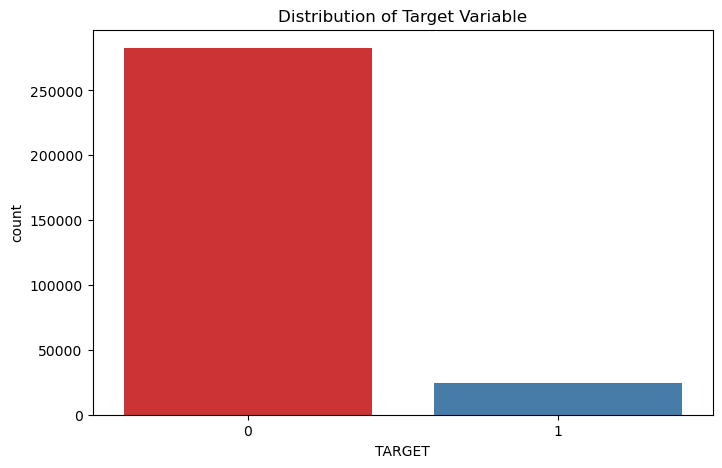

In [19]:
#visualize the target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='TARGET', data=application_train,palette="Set1")
plt.title('Distribution of Target Variable')
plt.show()

It is clear that the target variable distribution is highly imbalanced because Class 0(282686) has significantly more samples than Class 1(24825).According to description of the data -"1 indicates client with payment difficulties".This needs to be taken care before model building.

 ### <a name = "Accuracy_Majority_Class_Classifier">  4.2 Accuracy - Majority Class Classifier </a>

Let's calculate the accuracy of a simple model with majority class clasifier

In [20]:
#finding the accuracy of simple model with majority class classifier
class_counts = application_train['TARGET'].value_counts()
# Determine the majority class
majority_class = class_counts.idxmax()
accuracy = (class_counts[majority_class] / len(application_train))*100
print(f"Accuracy of Majority Class Classifier: {accuracy:.2f}")

Accuracy of Majority Class Classifier: 91.93


The Majority Class Classifier, which predicts the majority class for all instances, achieves an accuracy of 91.93% with a significant majority of clients having a positive TARGET value (repaid loans).

### <a name = "Target_Distribution_by_Gender">  4.3 Target Distribution by Gender </a>

Let's see how target is varying with respect to gender

In [21]:
#Create a pivot table to see the distribution of Target by Gender
gender_status = pd.pivot_table(application_train,index='CODE_GENDER',columns='TARGET',values='SK_ID_CURR',aggfunc='count')
gender_status

TARGET,0,1
CODE_GENDER,,
F,188278.0,14170.0
M,94404.0,10655.0
XNA,4.0,NaN


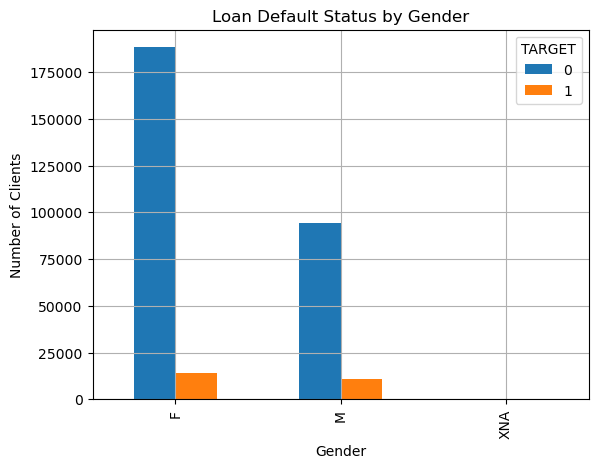

In [22]:
#visualize the target distribution with respect to gender
gender_status.plot(kind='bar', stacked = False)
plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.legend(title = 'TARGET')
plt.grid('true')
plt.title('Loan Default Status by Gender')
plt.show()

It is clear that females are the highest borrowers of loans than men and they tend to face more difficuilties than men to repay the loan.

### <a name = "Target_Distribution_by_Family_Status">  4.4 Target Distribution by Family Status </a>

Let's check the distribution of TARGET by Family Status of Client

TARGET                       0        1
NAME_FAMILY_STATUS                     
Civil marriage         26814.0   2961.0
Married               181582.0  14850.0
Separated              18150.0   1620.0
Single / not married   40987.0   4457.0
Unknown                    2.0      NaN
Widow                  15151.0    937.0


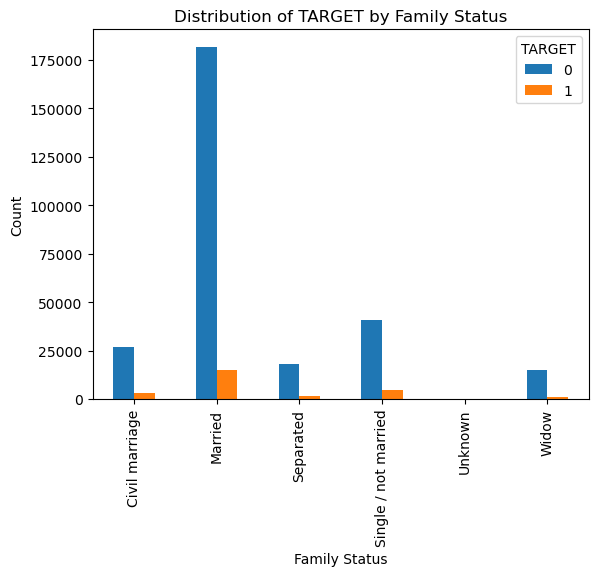

In [23]:
# Create a pivot table to calculate the distribution of 'TARGET' by family
family_pivot = pd.pivot_table(application_train, index='NAME_FAMILY_STATUS',columns=['TARGET'],values='SK_ID_CURR',aggfunc='count')
print(family_pivot)
family_pivot.plot(kind='bar', stacked=False)
plt.title('Distribution of TARGET by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.legend(title='TARGET', labels=['0', '1'])
plt.show()

Married clients seems to be the largest group and a substantial number have experienced financial difficulties.Clients categorized under 'Civil marriage' and 'Single/not married' statuses also exhibit a relatively higher proportion of clients with 'TARGET' 1.

### <a name = "Target_Distribution_by_Income">  4.5 Target Distribution by Income </a>

TARGET                       0        1
NAME_INCOME_TYPE                       
Businessman               10.0      NaN
Commercial associate   66257.0   5360.0
Maternity leave            3.0      2.0
Pensioner              52380.0   2982.0
State servant          20454.0   1249.0
Student                   18.0      NaN
Unemployed                14.0      8.0
Working               143550.0  15224.0


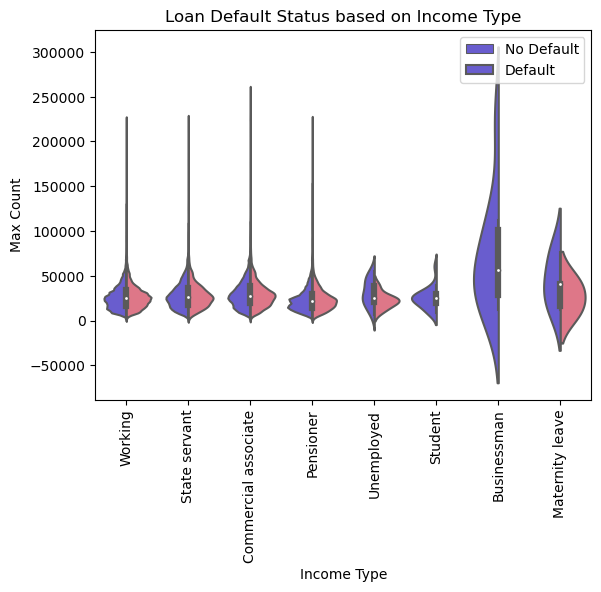

In [24]:
# Create a pivot table to calculate the distribution of 'TARGET' by 'INCOME_TYPE' 
income_pivot= pd.pivot_table(application_train, index=['NAME_INCOME_TYPE'],columns=['TARGET'], values='SK_ID_CURR',aggfunc='count')
print(income_pivot)


palette = {0: '#5a4ae1', 1: '#ef667d'}
income_type = sns.violinplot(x='NAME_INCOME_TYPE', y='AMT_ANNUITY', hue='TARGET', data=application_train, split=True, palette = palette)
plt.xlabel('Income Type')
plt.xticks(rotation = 90)
plt.ylabel('Max Count')
plt.title('Loan Default Status based on Income Type')
plt.legend(title = 'Target')
plt.legend(labels = ['No Default', 'Default'])
plt.show()

"Working" individuals constitute the largest group, with a significant number of them experiencing financial difficulties ("TARGET" 1)."State servants" have a relatively lower count but still exhibit a noteworthy number of "TARGET" 1 cases."Unemployed" and "Businessman" categories have fewer individuals with "TARGET" 1, while "Maternity leave" and "Student" categories have very few such cases.

### <a name = "Target_Distribution_by_Car_Age_and_Gender">  4.6 Target Distribution by Car Age and Gender</a>

<Axes: xlabel='CODE_GENDER', ylabel='OWN_CAR_AGE'>

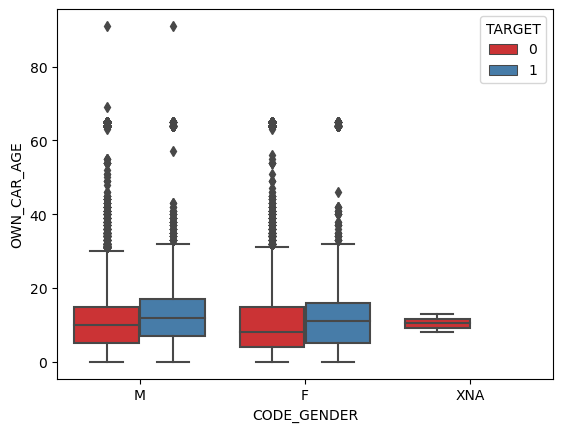

In [25]:
# Create a pivot table
car_age_pivot = pd.pivot_table(application_train, index=['CODE_GENDER', 'OWN_CAR_AGE'], columns=['TARGET'], values='SK_ID_CURR', aggfunc='count')

# Visualize the pivot table using a boxplot
fig, ax = plt.subplots()
sns.boxplot(x='CODE_GENDER', y='OWN_CAR_AGE', hue='TARGET', data=application_train, palette="Set1")


It is observed that Clients experiencing repayment difficulties tend to own older vehicles.

## <a name = "Correlation_And_Variance"> 5. Correlation And Variance </a>

Now that we have a grasp of the data columns, let's proceed to examine the relationship between each column (predictor) and the target variable.

### <a name = "Correlation_of_Predictors_with_Target"> 5.1.Correlation of Predictors with Target </a>

Correlation assesses the relationship between variables, indicating the strength and direction of their connection. Positive correlation implies variables move together, negative correlation means one increases as the other decreases, while zero correlation signifies no connection. The correlation value ranges from -1 to 1.

In [26]:
# Select only numerical predictor variables
numerical_predictors = application_train.select_dtypes(include=['number'])
# Calculate the correlation between the target variable and all numerical predictors
correlations = numerical_predictors.corrwith(application_train['TARGET']).sort_values(ascending = False)
print("Correlations with Target Variable:")
print(correlations)

Correlations with Target Variable:
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
                                 ...   
FLOORSMAX_AVG                 -0.044003
DAYS_EMPLOYED                 -0.044932
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Length: 106, dtype: float64


The correlation matrix reveals that 'DAYS_BIRTH' shows a slight positive correlation.The external sources 'EXT_SOURCE_3,' 'EXT_SOURCE_2,' and 'EXT_SOURCE_1' show negative correlations with the 'TARGET' variable, acting as a valuable indicators for evaluating the risk of repayment, with 'EXT_SOURCE_3' showing the strongest predictor among them.

### <a name = "Variance"> 5.2 Variance </a>

In [27]:
# Calculate the variance of numerical columns
var = numerical_predictors.var().sort_values(ascending= True)
# Print the variance for each column
print(var)

FLAG_MOBIL          3.251916e-06
FLAG_DOCUMENT_12    6.503811e-06
FLAG_DOCUMENT_10    2.276297e-05
FLAG_DOCUMENT_2     4.227326e-05
FLAG_DOCUMENT_4     8.129156e-05
                        ...     
SK_ID_CURR          1.056582e+10
DAYS_EMPLOYED       1.995884e+10
AMT_INCOME_TOTAL    5.622739e+10
AMT_GOODS_PRICE     1.364907e+11
AMT_CREDIT          1.619988e+11
Length: 106, dtype: float64


Features like FLAG_MOBIL, FLAG_DOCUMENT_12, and FLAG_DOCUMENT_10 exhibit extremely low variances, indicating little variation in these columns, making them potentially less informative for model predictions.

SK_ID_CURR, DAYS_EMPLOYED, AMT_INCOME_TOTAL, AMT_GOODS_PRICE, and AMT_CREDIT have significantly higher variances, suggesting substantial variability in these features, making them potentially influential for modeling.

In [28]:
# Calculate the variance for each column in the DataFrame
variance = numerical_predictors.var()
# Set a threshold for near-zero variance (e.g., 0.01)
threshold = 0.01
# Identify columns with near-zero variance
near_zero_variance_columns = variance[variance <threshold].index.tolist()
# Print the columns with near-zero variance
print("Columns with near-zero variance:")
print(near_zero_variance_columns)

Columns with near-zero variance:
['REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR']


In [29]:
# Columns with zero variance
zero_variance_columns = variance[variance == 0 ].index
print(zero_variance_columns)

Index([], dtype='object')




There are no columns with zero variance.

## <a name = "Feature_Engineering"> 6.Feature Engineering </a>

## <a name = "Missing_Null_Values"> 6.1 Missing/Null Values </a>

Now, We will address the significant issue of missing data. Missing data is a prevalent concern in datasets, and it's imperative to grasp effective techniques for managing it to ensure our analyses and modeling are reliable. In this phase, we will assess the prevalence of missing values in various columns and apply strategies to manage them proficiently.

In [30]:
# Calculate the number of null values for each column and sort them in descending order
null_values = application_train.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of null values for each column
percentage = (application_train.isnull().sum() * 100) / application_train.shape[0]

# Create a DataFrame to store both the count and percentage of null values
null_matrix = pd.concat([null_values, percentage], axis=1, keys=['Null_values', 'percentage'])

# Display the null_matrix DataFrame
null_matrix

,Null_values,percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [31]:
# Count the number of columns with 0 null values
columns_with_no_nulls = null_matrix[null_matrix['Null_values'] == 0].shape[0]
print(f"Number of columns with 0 null values: {columns_with_no_nulls}")

Number of columns with 0 null values: 55


Out of 122 Columns, only 55 columns are having no null/missing values

In [32]:
# Count the number of columns with more than 50% null values
columns_with_more_than_50_percent_nulls = (null_matrix['percentage'] > 50).sum()
print(f"Number of columns with more than 50% null values: {columns_with_more_than_50_percent_nulls}")

Number of columns with more than 50% null values: 41


The problem we are facing here is the huge amount of missing data with 41 columns contains missing informations with proportion more than 50%. This is considered as noisy data and can be eliminated.

## <a name = "Dropping_Columns"> 6.2 Dropping Columns </a>

We'll eliminate columns with over 50% missing values from our dataset, but we'll retain 'OWN_CAR_AGE' and 'EXT_SOURCE' columns due to their significant correlation with the target variable.

In [33]:
threshold = 50  # Setting the threshold percentage
# Calculating the total and percentage of missing values for each column
total = application_train.isnull().sum()
percentage = (application_train.isnull().sum() / application_train.isnull().count()) * 100
# Creating a mask to identify columns with more than the threshold percentage of missing values
mask = percentage > threshold
# Selecting the columns to remove
cols_to_remove = total[mask].index
# Identify columns to keep (OWN_CAR_AGE and EXT_SOURCE_1)
cols_to_keep = ['OWN_CAR_AGE', 'EXT_SOURCE_1']
# Remove the specified columns from cols_to_remove
cols_to_remove = [col for col in cols_to_remove if col not in cols_to_keep]
# Remove the columns from the DataFrame
application_train = application_train.drop(columns=cols_to_remove)

In [34]:
application_train.shape

(307511, 83)

In [35]:
application_test = application_test.drop(columns=cols_to_remove)

In [36]:
application_test.shape

(48744, 82)

## <a name = "Binning_Columns"> 6.3 Binning Columns</a>

Now, We will explore the concept of binning columns, focusing on the 'OWN_CAR_AGE' feature. Binning involves categorizing continuous data into distinct groups, making it more manageable and informative for analysis.

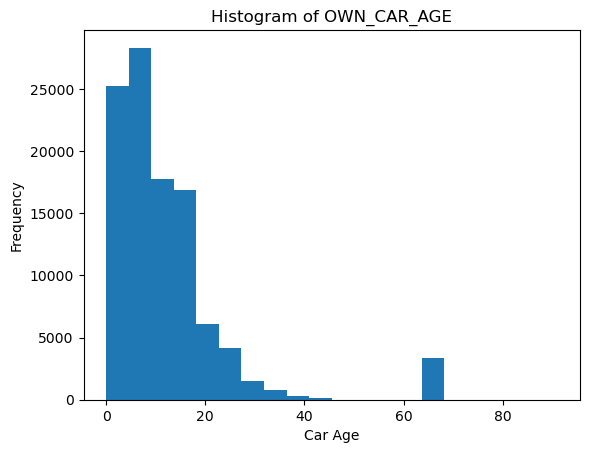

In [37]:
# Create a histogram of the 'OWN_CAR_AGE' column with 20 bins
plt.hist(application_train['OWN_CAR_AGE'], bins=20)

# Add labels and title to the plot
plt.xlabel('Car Age')
plt.ylabel('Frequency')
plt.title('Histogram of OWN_CAR_AGE')

# Display the histogram
plt.show()

In [38]:
# Get the count of each unique value in the 'OWN_CAR_AGE' column
value_counts = application_train['OWN_CAR_AGE'].value_counts()

# Display the counts of unique values
print(value_counts)

OWN_CAR_AGE
7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
        ... 
69.0       1
50.0       1
47.0       1
48.0       1
52.0       1
Name: count, Length: 62, dtype: int64


In [39]:
# Fill missing values in 'OWN_CAR_AGE' with 0
application_train['OWN_CAR_AGE'] = application_train['OWN_CAR_AGE'].fillna(0)

# Define a custom function to categorize car age
def categorize_car_age(age):
    if age == 0:
        return '0'
    elif 0 < age <= 4:
        return '0-4'
    elif 4 < age <= 8:
        return '4-8'
    else:
        return '>8'

# Apply the custom function to create the 'CAR_AGE_BINS' column
application_train['CAR_AGE_BINS'] = application_train['OWN_CAR_AGE'].apply(categorize_car_age)

# Display the 'CAR_AGE_BINS' and 'OWN_CAR_AGE' columns
print(application_train[['CAR_AGE_BINS', 'OWN_CAR_AGE']].head())


  CAR_AGE_BINS  OWN_CAR_AGE
0            0          0.0
1            0          0.0
2           >8         26.0
3            0          0.0
4            0          0.0


In [40]:
# Fill missing values in 'OWN_CAR_AGE' with 0 in the test dataset
application_test['OWN_CAR_AGE'] = application_test['OWN_CAR_AGE'].fillna(0)

# Define a custom function to categorize car age
def categorize_car_age(age):
    if age == 0:
        return '0'
    elif 0 < age <= 4:
        return '0-4'
    elif 4 < age <= 8:
        return '4-8'
    else:
        return '>8'

# Apply the custom function to create the 'CAR_AGE_BINS' column in the test dataset
application_test['CAR_AGE_BINS'] = application_test['OWN_CAR_AGE'].apply(categorize_car_age)

# Display the 'CAR_AGE_BINS' and 'OWN_CAR_AGE' columns in the test dataset
print(application_test[['CAR_AGE_BINS', 'OWN_CAR_AGE']].head())


  CAR_AGE_BINS  OWN_CAR_AGE
0            0          0.0
1            0          0.0
2          4-8          5.0
3            0          0.0
4           >8         16.0


## <a name = "Mistaken_Values"> 6.4 Mistaken Values</a>

In our earlier data understanding phase, we identified columns with incorrect values. For instance, the 'Days_birth' column exhibits negative minimum values, necessitating correction.

In [41]:
#absolute the values of DAYS_BIRTH Column
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])

Text(0, 0.5, 'Number of clients')

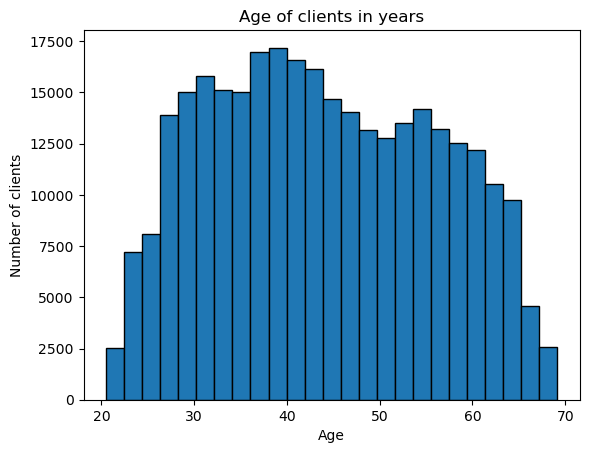

In [42]:
# A quick look at the age column 
plt.hist(application_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title("Age of clients in years")
plt.xlabel("Age")
plt.ylabel("Number of clients")

The age feature was also recorded in negatives and in days. We turned it into positive values in the train dataset. That we took a look at the distribution of ages which looked pretty normal(between 20 and 70 years old)

Similarly, for columns such as employment days, registration days, and last phone change days, it is necessary to convert the values to positive using the absolute function.

In [43]:
application_train['DAYS_EMPLOYED']=application_train['DAYS_EMPLOYED'].abs()
application_train['DAYS_REGISTRATION']=application_train['DAYS_REGISTRATION'].abs()
application_train['DAYS_LAST_PHONE_CHANGE']=application_train['DAYS_LAST_PHONE_CHANGE'].abs()

In [44]:
application_test['DAYS_BIRTH'] = abs(application_test['DAYS_BIRTH'])
application_test['DAYS_EMPLOYED']=application_test['DAYS_EMPLOYED'].abs()
application_test['DAYS_REGISTRATION']=application_test['DAYS_REGISTRATION'].abs()
application_test['DAYS_LAST_PHONE_CHANGE']=application_test['DAYS_LAST_PHONE_CHANGE'].abs()

## <a name = "Joining_Datasets"> 6.5. Joining Datasets </a>

Let's join credit bureau dataset with present application train dataset.

In [45]:
# Define a dictionary with aggregation functions for specific columns in a DataFrame
bureau_agg_dict = {
  'SK_ID_BUREAU': ['count'],
  'DAYS_CREDIT': ['min', 'max', 'mean'],
  'CREDIT_DAY_OVERDUE': ['min', 'max', 'mean'],
  'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
  'DAYS_ENDDATE_FACT': ['min', 'max', 'mean'],
  'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
  'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
  'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
  'AMT_CREDIT_SUM_LIMIT': ['max', 'mean', 'sum'],  
  'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
  'AMT_ANNUITY': ['max', 'mean', 'sum'],
}

In [46]:
# Group the 'bureau_data' DataFrame by the 'SK_ID_CURR' column and apply aggregation functions from 'bureau_agg_dict'
bureau_agg = bureau_data.groupby(['SK_ID_CURR']).agg(bureau_agg_dict)

# Rename the columns in 'bureau_agg' by joining the aggregation function names with column names
bureau_agg.columns = ['BUREAU_'+('_').join(column).upper() for column in bureau_agg.columns.ravel()]

# Reset the index of the 'bureau_agg' DataFrame to make 'SK_ID_CURR' a regular column
bureau_agg = bureau_agg.reset_index()

# Display the first few rows of the resulting 'bureau_agg' DataFrame
bureau_agg.head()

,SK_ID_CURR,BUREAU_SK_ID_BUREAU_COUNT,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,...,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_LIMIT_MAX,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM
0,100001,7,-1572,-49,-735.000000,0,0,0.0,-1329.0,1778.0,...,596686.5,0.000,0.00000,0.000,0.0,0.0,0.0,10822.5,3545.357143,24817.5
1,100002,8,-1437,-103,-874.000000,0,0,0.0,-1072.0,780.0,...,245781.0,31988.565,7997.14125,31988.565,0.0,0.0,0.0,0.0,0.000000,0.0
2,100003,4,-2586,-606,-1400.750000,0,0,0.0,-2434.0,1216.0,...,0.0,810000.000,202500.00000,810000.000,0.0,0.0,0.0,NaN,NaN,0.0
3,100004,2,-1326,-408,-867.000000,0,0,0.0,-595.0,-382.0,...,0.0,0.000,0.00000,0.000,0.0,0.0,0.0,NaN,NaN,0.0
4,100005,3,-373,-62,-190.666667,0,0,0.0,-128.0,1324.0,...,568408.5,0.000,0.00000,0.000,0.0,0.0,0.0,4261.5,1420.500000,4261.5


In [47]:
# Merge 'application_train' with 'bureau_agg' using a left join on the 'SK_ID_CURR' column
train_bureau_data = application_train.merge(bureau_agg, on='SK_ID_CURR', how='left')

# Merge 'application_test' with 'bureau_agg' using a left join on the 'SK_ID_CURR' column
test_bureau_data = application_test.merge(bureau_agg, on='SK_ID_CURR', how='left')

# Display the first few rows of the 'train_bureau_data' DataFrame
train_bureau_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_LIMIT_MAX,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,245781.0,31988.565,7997.14125,31988.565,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,810000.000,202500.00000,810000.000,0.0,0.0,0.0,NaN,NaN,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.000,0.00000,0.000,0.0,0.0,0.0,NaN,NaN,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.000,0.00000,0.000,0.0,0.0,0.0,NaN,NaN,0.0


In [48]:
train_bureau_data.shape

(307511, 114)

In [49]:
test_bureau_data.shape

(48744, 113)

In [50]:
test_bureau_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_LIMIT_MAX,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,596686.5,0.00,0.000000,0.00,0.0,0.0,0.0,10822.50,3545.357143,24817.500
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,568408.5,0.00,0.000000,0.00,0.0,0.0,0.0,4261.50,1420.500000,4261.500
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,NaN,NaN,0.00,0.0,0.0,0.0,0.00,0.000000,0.000
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,186304.5,101390.76,14484.394286,101390.76,0.0,0.0,0.0,12897.09,3012.010714,21084.075
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Select columns with numerical data types in the 'train_bureau_data' DataFrame
numerical_predictors = train_bureau_data.select_dtypes(include=['number'])

# Calculate the correlation matrix between numerical predictors
corr = numerical_predictors.corr()

# Sort the correlation values with respect to the 'TARGET' variable in descending order
corr["TARGET"].sort_values(ascending=False)

TARGET                         1.000000
BUREAU_DAYS_CREDIT_MEAN        0.089729
BUREAU_DAYS_CREDIT_MIN         0.075248
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
                                 ...   
DAYS_LAST_PHONE_CHANGE        -0.055218
DAYS_BIRTH                    -0.078239
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, Length: 100, dtype: float64

It is observed that Ext_sources are having a negative correlation values indicating higher values of 'EXT_SOURCE_3,' 'EXT_SOURCE_2,' and 'EXT_SOURCE_1' are associated with lower likelihoods of repayment difficulties, while 'DAYS_CREDIT' and 'REGION_RATING_CLIENT_W_CITY' show positive correlations with the likelihood of repayment difficulties.

It is observed that Ext_sources are having a negative correlation values indicating higher values of 'EXT_SOURCE_3,' 'EXT_SOURCE_2,' and 'EXT_SOURCE_1' are associated with lower likelihoods of repayment difficulties, while 'DAYS_CREDIT' and 'REGION_RATING_CLIENT_W_CITY' show positive correlations with the likelihood of repayment difficulties.

## <a name = "Categorical_Columns"> 6.6 Categorical Columns </a>

In [52]:
# Look at the number of entries of each unique categorical value per column
train_bureau_data.select_dtypes("object").apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
EMERGENCYSTATE_MODE            2
CAR_AGE_BINS                   4
dtype: int64

In [53]:
# Look at the number of entries of each unique categorical value per column
test_bureau_data.select_dtypes("object").apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
EMERGENCYSTATE_MODE            2
CAR_AGE_BINS                   4
dtype: int64

Upon reviewing the data types of our features, we have identified a mix of integers, floats, and categorical objects. To handle these categorical features, we assessed the number of unique categories within each one. For those with a maximum of two categories, we intend to apply label encoding, while features with more than two categories will undergo one-hot encoding. However, before proceeding, we plan to remove the two columns with the highest number of categorical features (occupation type and organization type) due to the resource-intensive nature of one-hot encoding for these columns and their relatively weak predictive value regarding client repayment behavior.

## <a name = "Outliers"> 7. Outliers </a>

Outliers, or data points that significantly differ from the majority of the dataset, can have a notable impact on data analysis and modeling. Identifying and addressing outliers is essential to prevent them from skewing statistical results or negatively affecting predictive models. In this section, we will delve into the detection of Outliers.

In [54]:
# Select numerical columns
numerical_columns = application_train.select_dtypes(include=[float, int]).columns
# Calculate Z-scores for numerical columns
z_scored_train = (application_train[numerical_columns] - application_train[numerical_columns].mean()) / application_train[numerical_columns].std()
z_scored_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.733420,3.374480,-0.577537,0.142129,-0.478094,-0.166146,-0.507235,-0.149452,-1.506877,-0.481110,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167877,-0.291915,-0.334327,-0.481451
1,-1.733410,-0.296341,-0.577537,0.426791,1.725447,0.592665,1.599971,-1.252748,0.166821,-0.477158,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167877,-0.291915,-0.334327,-1.016412
2,-1.733400,-0.296341,-0.577537,-0.427195,-1.152886,-1.404646,-1.091894,-0.783450,0.689508,-0.484064,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167877,-0.291915,-0.334327,-1.016412
3,-1.733381,-0.296341,-0.577537,-0.142533,-0.711429,0.177865,-0.653400,-0.928989,0.680113,-0.463884,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.733371,-0.296341,-0.577537,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,0.892533,-0.463891,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167877,-0.291915,-0.334327,-1.016412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.732369,-0.296341,-0.577537,-0.047646,-0.855488,0.031008,-0.848286,0.845394,-1.537583,-0.483985,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307507,1.732378,-0.296341,-0.577537,-0.408218,-0.818593,-1.042317,-0.848286,0.310592,1.085705,2.133608,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.732388,-0.296341,-0.577537,-0.066623,0.195378,0.198046,0.126145,-1.147118,-0.245417,-0.428874,...,-0.090534,-0.024402,-0.022529,-0.018305,11.849826,-0.063203,-0.167877,0.799785,-0.334327,-0.481451
307509,1.732398,3.374480,-0.577537,0.009287,-0.568756,-0.476314,-0.592498,-1.124633,-0.934007,-0.451356,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167877,-0.291915,-0.334327,-1.016412


These Z-scores play a significant role in identifying outliers within a dataset, where values with Z-scores exceeding ±3 standard deviations are often categorized as extreme outliers. Detecting outliers is crucial as they can signify data anomalies or errors, potentially affecting the outcome of statistical analyses and machine learning models. The normalization achieved through Z-scores allows for the identification and handling of outliers, resulting in more robust and meaningful data analysis. When analyzing data, particular attention is paid to values with Z-scores exceeding +3 or falling below -3, as these extreme values may require special consideration or data cleansing. Conversely, Z-scores near 0 indicate that data points are close to the mean and are not considered outliers, making them valuable for understanding the central tendency of the data.

## <a name = "Joining_Datasets">8. Joining Datasets </a>

Let's join credit bureau dataset with present application train dataset.

In [55]:
# Let's join bureau dataset with application train dataset using ID as unique identifier
train_bureau_data = application_train.merge(bureau_data, on='SK_ID_CURR')
train_bureau_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-48.0,NaN,0,0.0,0.0,NaN,0.0,Credit card,-47,NaN
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0,19071.0,NaN,NaN,0.0,Consumer credit,-906,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0,120735.0,0.0,0.0,0.0,Consumer credit,-34,0.0


In [56]:
numerical_predictors = train_bureau_data.select_dtypes(include=['number'])
corr = numerical_predictors.corr()
corr["TARGET"].sort_values(ascending = False)

TARGET                         1.000000
DAYS_CREDIT                    0.061556
REGION_RATING_CLIENT_W_CITY    0.050320
REGION_RATING_CLIENT           0.048372
DAYS_ID_PUBLISH                0.042199
                                 ...   
EXT_SOURCE_2                  -0.146115
EXT_SOURCE_1                  -0.152075
EXT_SOURCE_3                  -0.184276
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_2                     NaN
Name: TARGET, Length: 83, dtype: float64

It is observed that Ext_sources are having a negative correlation values indicating higher values of 'EXT_SOURCE_3,' 'EXT_SOURCE_2,' and 'EXT_SOURCE_1' are associated with lower likelihoods of repayment difficulties, while 'DAYS_CREDIT' and 'REGION_RATING_CLIENT_W_CITY' show positive correlations with the likelihood of repayment difficulties.

## <a name = "Summary"> 9. Summary </a>

The Application Train dataset has been thoroughly understood, including an examination of the target variable distributions with respect to different predictors. To gain better insights, we visualized these aspects. Notably, a simple majority class classifier achieved an accuracy of 92%, serving as our baseline for model evaluation.

During the data preprocessing phase, we addressed various issues. First, we dropped 41 columns with over 50% null values, except for 'EXT_SOURCE_1' and 'OWN_CAR_AGE' due to their significant correlations with the target variable.Application dataset which was having 122 columns is down to 83 columns.Additionally, a new feature called 'CAR_AGE_BINS' was introduced to categorize car ages for better analysis. We also rectified erroneous values in specific columns, including 'DAYS_EMPLOYED,' 'DAYS_REGISTRATION,' and 'DAYS_LAST_PHONE_CHANGE,' by taking their absolute values. Further imputation of null/missing values is planned for strong predictors before modeling. Categorical variables need to be transformed using label encoding or one-hot encoding to enable the model to effectively learn from these features and make accurate predictions.

As we transition into the modeling phase, our focus will be on completing the data cleaning process, particularly dealing with columns containing a significant number of missing, erroneous, or outlier data points. These data anomalies have the potential to significantly impact our analysis and model performance. It's crucial to emphasize that the same data preprocessing procedures applied to the training dataset will be applied to the test dataset. Moreover, we will explore fundamental machine learning models and assess their performance by comparing AUC scores to select the most suitable model for our task.